<mdtraj.Trajectory with 10001 frames, 22 atoms, 3 residues, and unitcells>
Computed Phi angles: (array([[ 4,  6,  8, 14]]), array([[1.1571589 ],
       [1.2840097 ],
       [0.97970545],
       ...,
       [1.2678711 ],
       [0.97197163],
       [1.2949666 ]], dtype=float32))
[[1.1571589 ]
 [1.2840097 ]
 [0.97970545]
 ...
 [1.2678711 ]
 [0.97197163]
 [1.2949666 ]]
Computed Psi angles: (array([[ 6,  8, 14, 16]]), array([[ 0.13115838],
       [-0.32592556],
       [-1.4321705 ],
       ...,
       [-0.73300225],
       [-0.852031  ],
       [-1.3798847 ]], dtype=float32))
[[ 0.13115838]
 [-0.32592556]
 [-1.4321705 ]
 ...
 [-0.73300225]
 [-0.852031  ]
 [-1.3798847 ]]
Phi angles type: <class 'tuple'>
Psi angles type: <class 'tuple'>


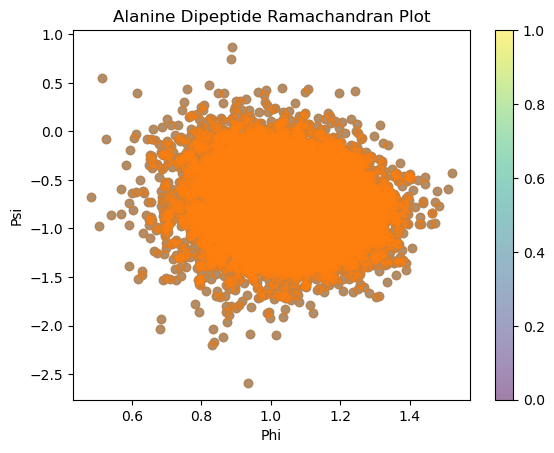

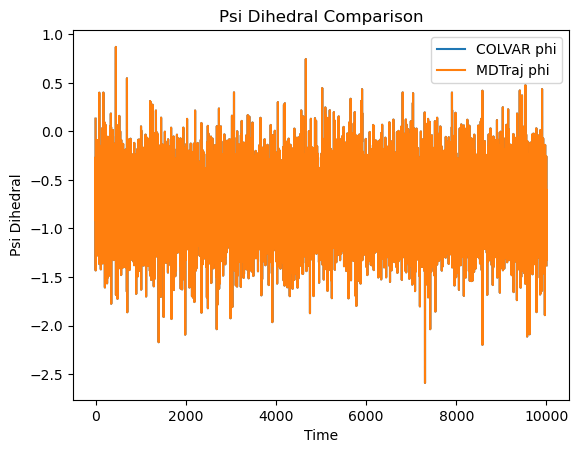

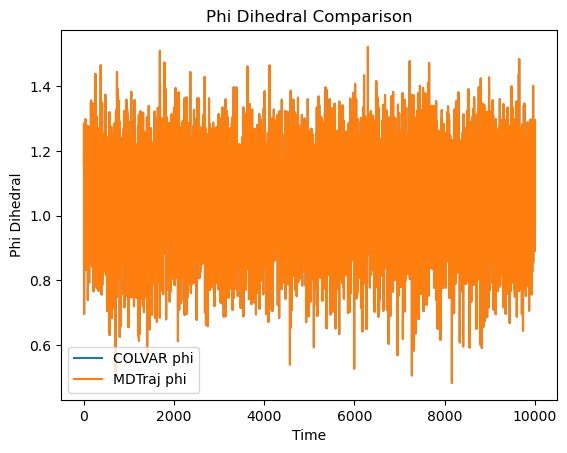

In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Replace 'path/to/your/file.xvg' with the actual path to your .xvg file
txt_file = '/home/mr6966/comp-lab-class-2024/comp-lab-class-2024-MR/Week6-Metadynamics/Exercise1/topolB/COLVAR'

# Read the data from the .xvg file
colvar_data = np.loadtxt(txt_file)

# Assuming the first column is x and the second column is y
time = colvar_data[:, 0]
phi = colvar_data[:, 1]
psi = colvar_data[:, 2]

traj = md.load('/home/mr6966/comp-lab-class-2024/comp-lab-class-2024-MR/Week6-Metadynamics/Exercise1/topolB/traj_comp.xtc', top='/home/mr6966/comp-lab-class-2024/comp-lab-class-2024-MR/Week6-Metadynamics/Exercise1/topolB/dialaB.pdb', stride = 10)
print (traj)
phi_angles = md.compute_phi(traj)
phi_array = phi_angles[1]
print(f'Computed Phi angles: {phi_angles}')
print (phi_array)
psi_angles = md.compute_psi(traj)
psi_array = psi_angles[1]
print(f'Computed Psi angles: {psi_angles}')
print (psi_array)


print(f'Phi angles type: {type(phi_angles)}')
print(f'Psi angles type: {type(psi_angles)}')

plt.scatter(phi, psi, label='COLVAR', alpha=0.7)
plt.scatter(phi_array, psi_array, label='MDTraj', alpha=0.5)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.title('Alanine Dipeptide Ramachandran Plot')
plt.colorbar()
plt.savefig('../Figures/Unbiased Ramachandran_B')

plt.figure()
plt.plot(psi, label='COLVAR phi')
plt.plot(psi_array, label='MDTraj phi')
plt.xlabel('Time')
plt.ylabel('Psi Dihedral')
plt.legend()
plt.title('Psi Dihedral Comparison')
plt.savefig('../Figures/Unbiased_Psi_Dihedral_B')

plt.figure()
plt.plot(phi, label='COLVAR phi')
plt.plot(phi_array, label='MDTraj phi')
plt.xlabel('Time')
plt.ylabel('Phi Dihedral')
plt.legend()
plt.title('Phi Dihedral Comparison')
plt.savefig('../Figures/Unbiased_Phi_Dihedral_B')